# JUPYTER CON CODICE PER IL ROUND (1v1)

## MEMO: Use as kernel the core jupyter

Strategies:
* **Nice guy**: always cooperate (the function's output is always $u_C$)
* **Bad guy**: always defect 
* **Mainly nice**: randomly defect $k\%$ of the times and cooperate $100-k\%$, $k<50$
* **Mainly bad**: randomly defect $k\%$ of the times and cooperate $100-k\%$, $k>50$
* **Tit-for-tat**: start by cooperating, then repeat what the opponent has done in the previous move
* **Random guy**: randomly defect or cooperate
* **Resentful guy**: cooperate until the opponent defects once, then always defect
* **Trusting guy**: initially is like random guy (coop/defect at k=50%), then updates k according to match history (% of coop over the total)
* **Balancing guy**: cooperates only for an even cooperation history, otherwise defect
* **Mid Resentful guy**: usually cooperates, unless the opponent has defected on any of the previous 3 moves
* **Reverse Tit-for-tat**: it does the reverse of Tft. It defects on the first move, then plays the reverse of the opponent’s last move.

In [132]:
import numpy as np
from numpy import random as npr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors

In [131]:
# INITIAL DATA:_____________________________________________
cooperate = np.array( [ 1, 0 ] )
defect = np.array( [ 0, 1 ] )
# default Payoff matrix
default_R = 2
default_S = 0
default_T = 3
default_P = 1
Payoff = np.array( [ [ default_R , default_S ], [ default_T, default_P ] ] )   # matrice delle ricmopense
k = 0.25       # percentage of defect for mainly nice ( and 1-k percentage of cooperate for mainly bad)







# STRATEGIES:________________________________________________
    # template function:
    # def strategy( round_number = 0, match_history = [[]], player_index = 0 ) : 
    #     # move either cooperate or defect
    #     move = cooperate/defect
    #     return move 

# nice guy function: always cooperate
def nice_guy( round_number = 0, match_history = [[]], player_index = 0 ) :      # 'None' al posto di [[]] ?
    move = cooperate
    return move 

# bad guy function: always defect 
def bad_guy( round_number = 0, match_history = [[]], player_index = 0 ) :        # 'None' al posto di [[]] ?
    move = defect
    return move 

# mainly nice guy: randomly defect k% of the times and cooperate 100-k %, k<50
def mainly_nice( round_number = 0, match_history = [[]], player_index = 0 ) :                                                                         # eccezione da gestire meglio?
    u = npr.random()                                                                           # corretto in random() invece di random(1)
    if ( u < k ) : move = defect
    else : move = cooperate
    return move

# mainly bad guy: randomly defect k% of the times and cooperate 100-k %, k>50
def mainly_bad( round_number = 0, match_history = [[]], player_index = 0 ) :                                                                           # eccezione da gestire meglio?
    u = npr.random()                                                                            # corretto in random() invece di random(1)
    if ( u < 1-k ) : move = defect
    else : move = cooperate
    return move

# random guy: randomly defect or cooperate
def random_guy( round_number = 0, match_history = [[]], player_index = 0 ) :                                                                            # eccezione da gestire meglio?
    u = npr.random()                                                                           # corretto in random() invece di random(1)
    if ( u < 0.5 ) : move = defect
    else : move = cooperate
    return move

# tit_for_tat function: start by cooperating, then repeat what the opponent has done in the previous move
def tit_for_tat( round_number = 0, match_history = [[]], player_index = 0 ) : 
    if ( round_number == 0 ) : move = cooperate
    else : move = match_history[ round_number - 1 ][ 1 - player_index ]
    return move

# resentful guy: cooperate until the opponent defects once, then always defect
def resentful_guy( round_number = 0, match_history = [[]], player_index = 0 ) : 
    move = cooperate
    if ( round_number > 0 ) :
        for res in match_history :
            if np.all( res[ 1 - player_index  ] == defect ) :
                move = defect
    return move

# trusting guy (increasing odds of cooperating according to match history):
# initially is like random guy (coop/defect at k=50%), then updates k
def trusting_guy( round_number = 0, match_history = [[]], player_index = 0 ) :
    k = 0.5     # initial trust
    # environmental trust
    if ( round_number > 0 ) :
        coop = 0.         # numero di cooperazioni avversarie finora
        # 'res[ 1 - player_index  ][ 0 ]' prende il primo elemento della mossa avversaria (1 se ha cooperato, 0 se ha defectato)
        for res in match_history : coop += res[ 1 - player_index  ][ 0 ]
        k = coop / len( match_history )           # updated k
    u = npr.random()                                                                          # corretto in random() invece di random(1)
    if ( u > k ) : move = defect
    else : move = cooperate
    return move

# balancing guy (cooperates only for an even cooperation history, otherwise defect)
def balancing_guy( round_number = 0, match_history = [[]], player_index = 0 ) :
    move = defect
    if ( round_number > 0 ) :
        # total cooperation seen
        coop = 0
        for res in match_history : coop += ( res[ 0 ][ 0 ] + res[ 1 ][ 0 ])
        if ( ( coop % 2 ) == 0 ) : move = cooperate
    return move

# Mid resentful: cooperates on the first move, and defects if the opponent has defected on any of the previous 3 moves, else cooperates
def mid_resentful( round_number = 0, match_history = [[]], player_index = 0):
    move = cooperate
    # checko gli ultimi 3 turni (o meno se sono all'inizio):
    start = max(0, round_number - 3)
    for round_i in range(start, round_number):
        # controllo se la mossa avversaria corrisponde ad un defect=[0,,1]
        if np.array_equal(match_history[round_i][1 - player_index], defect):   
            move = defect
            break  # non serve continuare il controllo, esco dal for
    return move

# reverse tit_for_tat function: start by defecting, then does the opposite of what the opponent has done in the previous move
def reverse_tit_for_tat( round_number = 0, match_history = [[]], player_index = 0 ) : 
    if ( round_number == 0 ) : move = defect
    else : move = [1,1] - match_history[ round_number - 1 ][ 1 - player_index ]  
            # in this way i obtain the opposite move: [1,1] - [1,0] = [0,1] and [1,1] - [0,1] = [1,0]
    return move

# dictionary of all strategies
strategies = {
    'NiceGuy' : nice_guy,
    'BadGuy' : bad_guy,
    'MainlyNice' : mainly_nice,
    'MainlyBad' : mainly_bad,
    'RandomGuy': random_guy,
    'TitForTat' : tit_for_tat,
    'ResentfulGuy' : resentful_guy,
    'TrustingGuy' : trusting_guy,
    'Thanos' : balancing_guy,
    'MidResentful': mid_resentful,
    'ReverseTft': reverse_tit_for_tat,
}








# GAMES FUNCTIONS:

# function to play one round 1 vs 1 for two different strategies players
def round( key_1, key_2, round_number=0, match_history=[[]], M = Payoff ) :
    # getting strategies from dictionary
    S_1 = strategies[ key_1 ]
    S_2 = strategies[ key_2 ]
    # computing next move for each player
    u_1 = S_1( round_number, match_history, 0 )
    u_2 = S_2( round_number, match_history, 1 )
    # computing rewards for each player
    r_1 = np.dot( u_1, Payoff.dot(u_2))
    r_2 = np.dot( u_2, Payoff.dot(u_1))
    # updating match history
    match_history.append( [ u_1, u_2 ] )
    # returning results
    return r_1, r_2



# function to play a match of N rounds 1 vs 1 for two different strategies player
def match( key_1, key_2, N_rounds = 10, M = Payoff ) : 
    # match history strarting empty
    history = [ ]                                                                           
    # starting total rewards
    R_1 = 0
    R_2 = 0
    # list of partial sums
    Rewards = []
    for round_i in range( 0, N_rounds ) :
        r_1, r_2 = round( key_1, key_2, round_i, history, M )
        R_1 += r_1
        R_2 += r_2
        Rewards.append( [ R_1, R_2 ] )
    return Rewards              # it returns a list wiith the partial sums of the rewards

In [1]:
# TEST:
print( round('NiceGuy', 'TitForTat', 0, [[]]) )
print( match('BadGuy', 'ReverseTft', 14) )

TypeError: round() takes at most 2 arguments (4 given)

### 1v1 in 1 round, all combinations
Let's build a table of all possible 1v1 of 1 round:

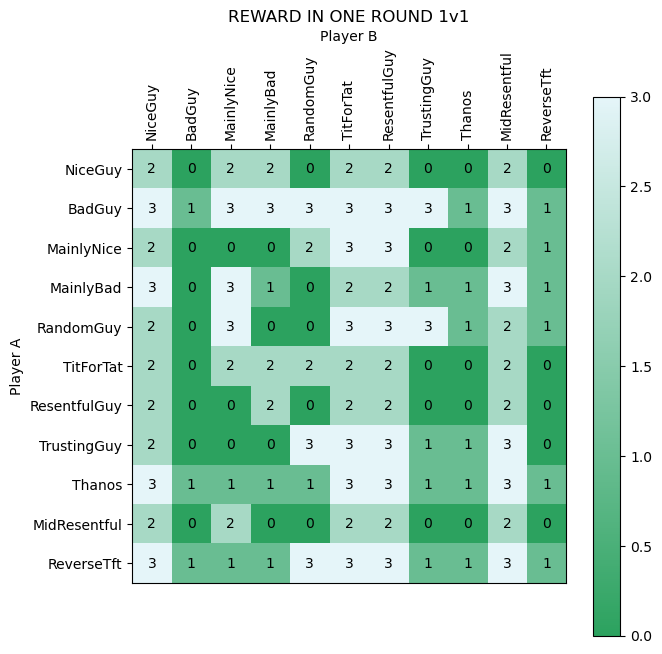

In [148]:
# let's initialize the matrix of rewards of 1v1 rounds for all strategies
table_rewards = []

# cycle over all strategies:
for i, key_1 in enumerate(strategies):
    table_rewards.append([])             # I add a row for each  strategy
    for j, key_2 in enumerate(strategies):
        a, b = round(key_1, key_2, round_number=0, match_history=[[]], M = Payoff )
        table_rewards[i].append(a)
#print(table_rewards)


# PLOT:
fig, ax = plt.subplots(1, 1 ,figsize=(7,7))
# Creiamo una colormap che va da rosso chiaro a rosso scuro
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_blue", ["#2ca25f", "#e5f5f9"])
graph = ax.imshow(table_rewards, cmap=custom_cmap)
plt.colorbar(graph)
# Etichette per gli assi con nomi delle strategie
strategy_names = list(strategies.keys())
plt.xticks( ticks=np.arange(len(strategy_names)), labels=strategy_names, rotation=90 )  # rotation for readability
plt.yticks( ticks=np.arange(len(strategy_names)), labels=strategy_names)
# Sposta l'asse X in alto
ax.xaxis.set_label_position('top')  
ax.xaxis.tick_top()  
# Inseriamo i valori nelle celle:
for i in range(len(strategy_names)):
    for j in range(len(strategy_names)):
        plt.text(j, i, str(table_rewards[i][j]), ha='center', va='center', color='black')
plt.title("REWARD IN ONE ROUND 1v1")
plt.xlabel("Player B")
plt.ylabel("Player A")
plt.show()

# df = pd.DataFrame(table_rewards, index = strategies , columns = strategies)
# df

### 1v1 matches, all combinations
Let's build a table of all possible 1v1 of 1 matches:

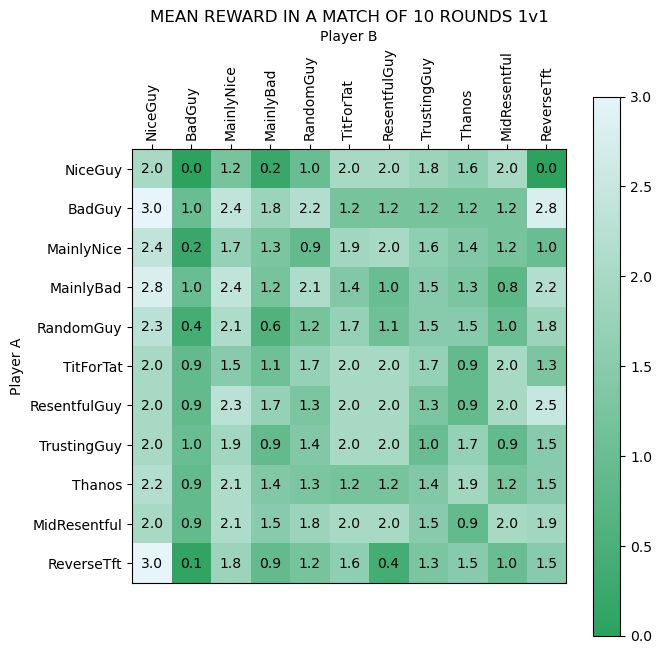

In [177]:
N = 10        # number of rounds

table_rewards = []               # let's initialize the matrix of rewards of 1v1 rounds for all strategies
table_partial_rewards = []       #  matrix of partial rewards, for the graphs. Its dimensions are (num_strateg)^2 x N^2 x 2
 
# cycle over all strategies:
for i, key_1 in enumerate(strategies):
    table_rewards.append([])             # I add a row for each  strategy
    for j, key_2 in enumerate(strategies):
        rew = match(key_1, key_2, N, M = Payoff )   # memo: it return a list of partial rewards
        table_rewards[i].append(rew[-1][0]/N)       # "/N" is for normalization  
        table_partial_rewards.append(rew)
#print(table_rewards)


# PLOT of matches rewards:
fig, ax = plt.subplots(1, 1 ,figsize=(7,7))
# Creiamo una colormap che va da rosso chiaro a rosso scuro
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_blue", ["#2ca25f", "#e5f5f9"])
graph = ax.imshow(table_rewards, cmap=custom_cmap)
plt.colorbar(graph)
# Etichette per gli assi con nomi delle strategie
strategy_names = list(strategies.keys())
plt.xticks( ticks=np.arange(len(strategy_names)), labels=strategy_names, rotation=90 )  # rotation for readability
plt.yticks( ticks=np.arange(len(strategy_names)), labels=strategy_names)
# Sposta l'asse X in alto
ax.xaxis.set_label_position('top')  
ax.xaxis.tick_top()  
# Inseriamo i valori nelle celle:
for i in range(len(strategy_names)):
    for j in range(len(strategy_names)):
        plt.text(j, i, str(table_rewards[i][j]), ha='center', va='center', color='black')
plt.title(f"MEAN REWARD IN A MATCH OF {N} ROUNDS 1v1")
plt.xlabel("Player B")
plt.ylabel("Player A")
plt.show()

# df = pd.DataFrame(table_rewards, index = strategies , columns = strategies)
# df



# PLOT of partial rewards to see the evolution:
#print(table_partial_rewards)
# x = np.arange(1,N+1)
# plt.plot(x, table_partial_rewards[0][:][1])
# print(table_partial_rewards[0][:][0])              #?????????????????????????

## DA IMPLEMENTARE:
* grafici che mostrino l'andamento dei punteggi parziali durante un match (da fare con ogni combinazione di strategie)
* try different values of the rewards
* cambia il numero di round e vedi cosa cambia